# Q1 : Read the dataset

In [27]:
import pandas as pd
df = pd.read_csv('C:/Users/MASROUR/pyproj/my_env/basedata/HW/HM3/adult_training.txt', sep=",")

In [28]:
df.head(10)

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


In [29]:
df.shape

(14797, 9)

## Data cleaning

In [30]:
##convert ? to NaN
import numpy as np
df = df.replace('?', np.NaN)
df.head(10)

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,NaN,10,Married-civ-spouse,NaN,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


In [31]:
##Number of NaN
print("The number of missing values for each column")
df.isnull().sum().sort_values(ascending=True)

The number of missing values for each column


age                 0
education           0
marital_status      0
sex                 0
capital_gain        0
capital_loss        0
income              0
workclass         829
occupation        834
dtype: int64

In [32]:
df.dropna(axis=0,inplace=True)

In [33]:
df.isnull().sum().sort_values(ascending=True)
#Now we don't have any NaN

age               0
workclass         0
education         0
marital_status    0
occupation        0
sex               0
capital_gain      0
capital_loss      0
income            0
dtype: int64

# Q2. Create a contingency table of workclass and sex, and plot it.


In [34]:
# contingency table
cross_tab=pd.crosstab(df.workclass,df.sex)
cross_tab

sex,Female,Male
workclass,,
Federal-gov,149,305
Local-gov,377,592
Private,3574,6707
Self-emp-inc,54,444
Self-emp-not-inc,178,992
State-gov,201,385
Without-pay,1,4


<AxesSubplot:xlabel='workclass', ylabel='count'>

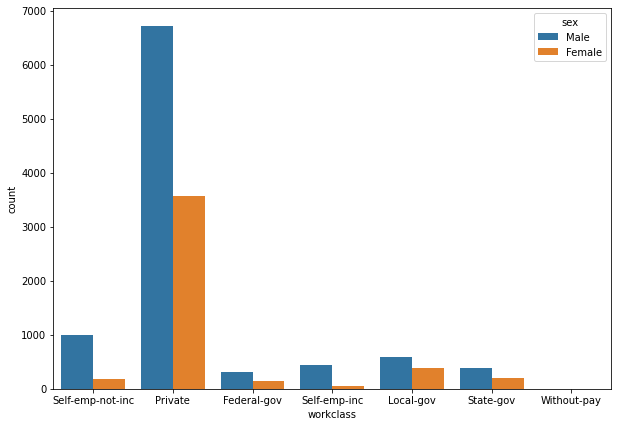

In [35]:
#Plot
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
sns.countplot(x="workclass",hue="sex",data=df)

# Q3. Create a contingency table of sex and marital status, and plot it.

In [37]:
#contingency table
cross_tab=pd.crosstab(df.sex,df.marital_status)
cross_tab

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,1160,6,693,89,1990,270,326
Male,768,4,5786,97,2543,171,60


<AxesSubplot:xlabel='sex', ylabel='count'>

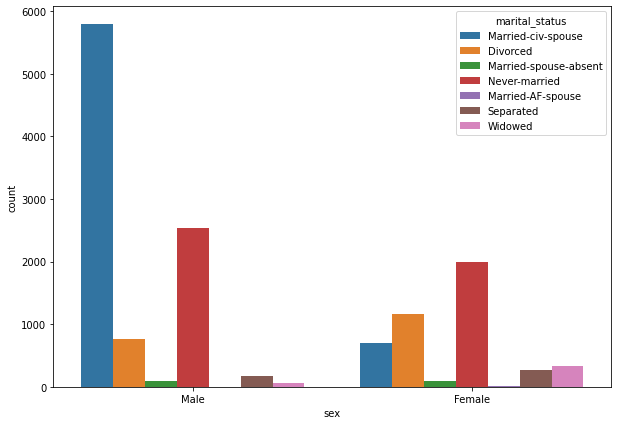

In [38]:
#Plot
plt.rcParams["figure.figsize"] = (10,7)
sns.countplot(x="sex",hue="marital_status",data=df)

# Q4. Create a new data frame, adultOver40, for those whose age > 40.

In [41]:
adultOver40=df[(df.age>40)]
adultOver40.head()

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
16,44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K


# Q5. Recreate the contingency table of sex and marital status for adultOver40.

In [42]:
#contingency table
cross_tab=pd.crosstab(adultOver40.sex,adultOver40.marital_status)
cross_tab

marital_status,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,
Female,690,285,34,246,130,302
Male,431,3193,42,303,69,59


# Q6. Determine whether any outliers exist for the education field.

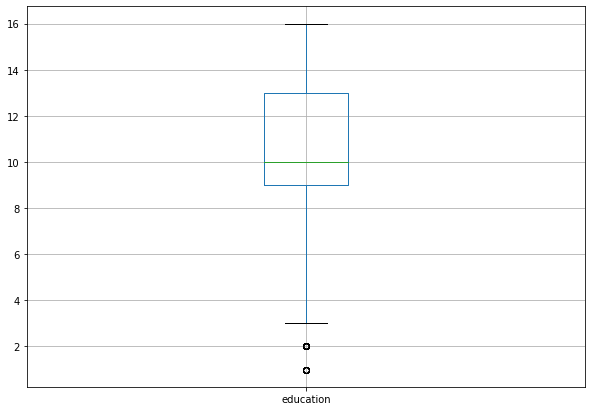

In [43]:
#plot a boxplot for education field
# We can visualize two circles indicate the outliers in the education field
adultOver40.boxplot(column="education")
plt.show()

# Q7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?


In [66]:
from sklearn.preprocessing import StandardScaler
df_sc=df["age"]
nrmlzd = StandardScaler() 
data_std =nrmlzd.fit_transform(df_sc.values.reshape(-1,1))
data_std= pd.DataFrame(data_std)
print("age standardized")
data_std.head()

age standardized


,0
0,0.866703
1,-0.043918
2,0.790818
3,1.018473
4,-0.575113


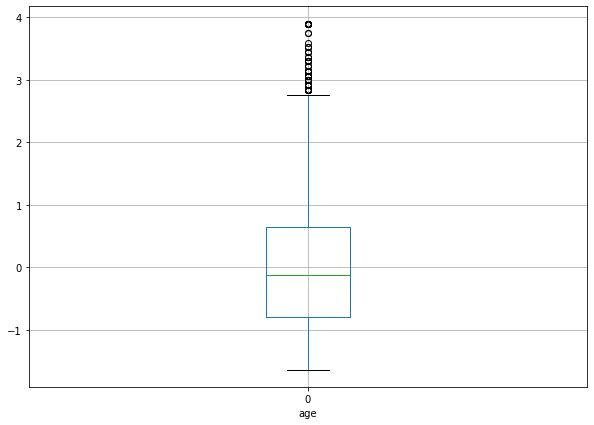

In [70]:
# we can visualize many circles that indicates a lot of outliers
data_std.boxplot()
plt.xlabel("age")
plt.show()

# Q8. Age anomaly? Select only records with age at least 80, and construct a histogram of age. Explain what you see.

In [45]:
adultOver80=adultOver40[(adultOver40['age'] >= 80)]
adultOver80.head()

,age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K


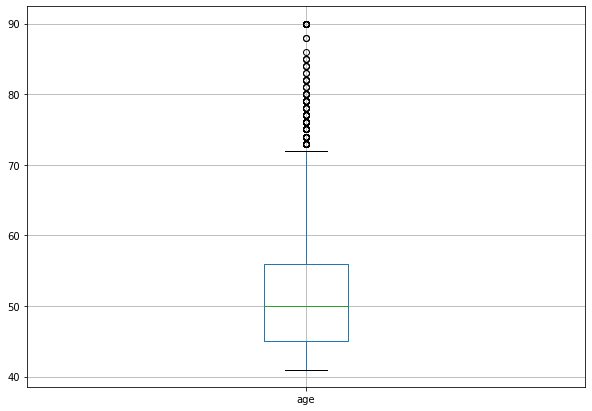

In [48]:
# We have many outliers for age 
adultOver40.boxplot(column="age")
plt.show()

<AxesSubplot:>

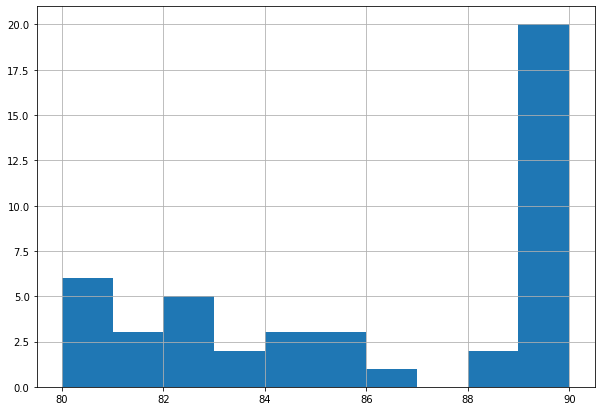

In [46]:
# We notice that most of individuals have an age greater than 88
adultOver80.age.hist()

# Q9. Summarize your findings.

In [73]:
#descriptive statistic for numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13963.0,38.578744,13.178298,17.0,28.0,37.0,47.0,90.0
education,13963.0,10.120604,2.586934,1.0,9.0,10.0,13.0,16.0
capital_gain,13963.0,1094.449187,7392.491856,0.0,0.0,0.0,0.0,99999.0
capital_loss,13963.0,90.127766,408.022260,0.0,0.0,0.0,0.0,3900.0


In [74]:
#descriptive statistic for categorical variables
df.describe(include=["O"]).T

,count,unique,top,freq
workclass,13963,7,Private,10281
marital_status,13963,7,Married-civ-spouse,6479
occupation,13963,14,Prof-specialty,1917
sex,13963,2,Male,9429
income,13963,2,<=50K,10491


**In this section we learned how to build a contengency table and plot it, we are now familiar with data extraction and standardization**